In [116]:
import numpy as np
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.metrics import MeanSquaredError
from random import *
%matplotlib inline

In [117]:
function_to_learn = lambda x: np.sin(x + np.sin(x)**2) + 0.01*np.random.randn(*x.shape)
all_X = np.arange(0, 100, 0.1, 'float')
all_X = [function_to_learn(x) for x in all_X]
all_data_X = np.zeros(shape=(int(len(all_X)-9), 10))

In [118]:
i = 0
for id, elem in enumerate(all_X):
    row_X = all_X[id:10+id]
    if len(row_X) == 10:
        all_data_X[i] = row_X
        i = i + 1

In [119]:
X = all_data_X.copy()
y = [[x[1], x[2], x[3]] for x in X]
y = y[9:]
y = np.array(y)
X = X[:-9]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 0)

In [121]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = Sequential()

model.add(Dense(units = 10, activation = 'tanh'))
model.add(Dropout(0.2))
model.add(Dense(units = 4, activation = 'tanh'))
model.add(Dense(3, activation = 'tanh'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = MeanSquaredError())
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,validation_data=(X_val, y_val),callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20,min_delta=0.1, verbose=10)])

Epoch 1/500
20/20 [==============================] - 0s 10ms/step - loss: 0.3891 - mean_squared_error: 0.3891 - val_loss: 0.1684 - val_mean_squared_error: 0.1684
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1784 - mean_squared_error: 0.1784 - val_loss: 0.0693 - val_mean_squared_error: 0.0693
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1133 - mean_squared_error: 0.1133 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 5/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 7/500
20/20 [==============

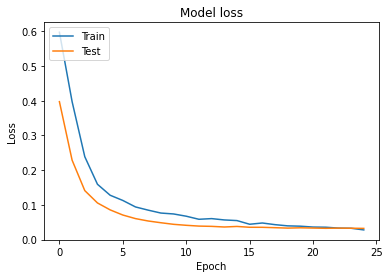

In [115]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')